# Problem Set on 2D convolution

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# hint: if you display with imshow set plt.imshow(..., interpolation='None') 
# otherwise the plotting routine also smoothes.

### Problem 1:  Normalization
Fill in the missing elements of Matrix $A$ from the lecture. 

In [2]:
import numpy as np

K = np.array([[1, 2, 1],
              [2, 4, 2],
              [1, 2, 1]])

B = np.array([[1, 0, 2, 3],
              [4, 5, 0, 6],
              [7, 0, 8, 9]])

#### 1a) by hand

First, calculate $A$ without any computers to understand the concept.

In [3]:
# put your markdown here



My solution is ...

$$A = \begin{bmatrix}
%& & & \\
%& & & \\
%& & & \\
17 & 20 & 25 & 28\\
42 & 46 & 54 & 58\\
41 & 44 & 61 & 64\\
\end{bmatrix}
$$ 


#### 1b) your function

Once you grasped the concept. Write a small ``function``, which takes input image $B$ and kernel $K$ and returns $A$. Compare your result with task 1a.

In [4]:
# put your function here




#### 1c) validation

Use ``scipy.signal.fftconvolve`` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html) to test the results from 1a and 1b. 

In [5]:
# put your code here




In [6]:
from scipy import signal

A_scipy = signal.fftconvolve(B, K, mode='same')
A_scipy

array([[17., 20., 25., 28.],
       [42., 46., 54., 58.],
       [41., 44., 61., 64.]])

With the ``scipy`` module we got the same matrix A as above. 

#### 1d) important remarks

If everything worked, by now you should understand the concept behind the convolution algorithm. From now on you can use, ``signal.fftconvolve``. Next, we have a look at your input and output. 

Start with a new random matrix $B$ (100 x 100). 

* What is the sum of your input image B?
* What is the sum of your output image A?
* What happened? How can you overcome this difference in input and output sum?

Hint: Try normalizing the sum of the Kernel to 1. Discuss what happens. What do you expect?


In [7]:
# put your code here





We create a 100x100 random array and calculate the sum.

In [8]:
# create random input image
B_rand = np.random.random((100,100))

# sum of new image (before)
print(np.sum(B_rand))

4941.595576842997


We convolve the created image and check its sum again.

In [9]:
# sum of new image after convolution
A_rand = signal.fftconvolve(B_rand, K, mode='same')
print(np.sum(A_rand))

78311.44911339256


This is weird, let's have a look at the images.

Text(0.5, 1.0, 'Output')

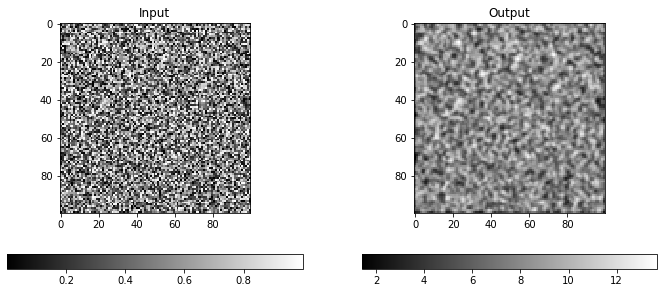

In [10]:
# figure setup
fig = plt.figure(figsize=(18,5))

# subplot 1 (input image)
ax = fig.add_subplot(131)
c = ax.imshow(B_rand , cmap='binary_r', interpolation='None')
plt.colorbar(c, orientation='horizontal')
plt.title('Input')

# subplot 2 (output image, convolved)
ax = fig.add_subplot(132)
c = ax.imshow(A_rand , cmap='binary_r', interpolation='None')
plt.colorbar(c, orientation='horizontal')
plt.title('Output')

The image is getting blurrier, which is the effect of convolution, but it is also getting brighter. The sum is not conserved. This is not good.

#### Hint: Normalizing the kernel

Following the hint, the kernel needs to be normalized in such a way, that its elements sum up to 1. Let's have a look.

In [11]:
# sum of the kernel elements
np.sum(K)

16

Let's try it again, but this time we normalize the kernel.

In [12]:
# sum of new image after convolution
A_rand_norm = signal.fftconvolve(B_rand, K/np.sum(K), mode='same')
print(np.sum(A_rand_norm))

4894.465569587035


In [13]:
# for comparison sum of input image
print(np.sum(B_rand))

4941.595576842997


Now, it is closer to the input sum. But now it got smaller than the input sum. What happened now? Now somehow "flux" was lost (see Problem 2).

## Problem 2: Leaking Image

In Problem 1, you experimented what happens when you normalize a kernel. But somehow the total values of the image did change. Try to pad your image, by embedding it in a 120x120 array of zeros. What happens?

In [14]:
# put your code here




In [15]:
# padding input array
B_rand_pad = np.zeros((120,120))
B_rand_pad[10:-10,10:-10] = B_rand

# sum of padded input image
np.sum(B_rand_pad)

4941.595576842997

The sum of the input did not change as expected, because we just padded it with zeros. But we are curious how the sum of the output image will change.

In [16]:
# convolving padded input image
A_rand_pad = signal.fftconvolve(B_rand_pad, K/np.sum(K), mode='same')

# sum of padded output image
np.sum(A_rand_pad)

4941.595576842997

Great, the output sum is now the same as the input sum when padding. 

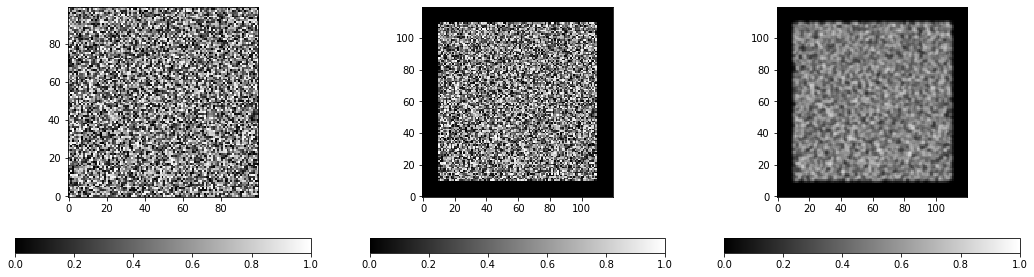

In [17]:
# figure setup
fig = plt.figure(figsize=(18,5))

# subplot 1 (input image)
ax = fig.add_subplot(131)
c = ax.imshow(B_rand , cmap='binary_r', vmin=0, vmax=1, origin='lower', interpolation='None')
plt.colorbar(c, orientation='horizontal')

# subplot 2 (input image with pad)
ax = fig.add_subplot(132)
c = ax.imshow(B_rand_pad , cmap='binary_r', vmin=0, vmax=1, origin='lower', interpolation='None')
plt.colorbar(c, orientation='horizontal')

# subplot 3 (output image with pad, convolved)
ax = fig.add_subplot(133)
c = ax.imshow(A_rand_pad , cmap='binary_r', vmin=0, vmax=1, origin='lower', interpolation='None')
plt.colorbar(c, orientation='horizontal')

However, notice that the "lost flux" (see Problem 1) is apparently in the rim. 

In [18]:
############
# overview #
############
print('sum of input  (not padded) ', np.sum(B_rand))
print('sum of input  (padded)     ', np.sum(B_rand_pad))
print('sum of output (not padded) ', np.sum(A_rand_norm))
print('sum of output (padded)     ', np.sum(A_rand_pad))
print('sum of output (padded)     ', np.sum(A_rand_pad[10:-10,10:-10]), 'within old limits')

sum of input  (not padded)  4941.595576842997
sum of input  (padded)      4941.595576842997
sum of output (not padded)  4894.465569587035
sum of output (padded)      4941.595576842997
sum of output (padded)      4894.465569587036 within old limits


Let's have a closer look at the rim. For this we use a logscale and a different colormap to be able to distinguish zeros from small values.

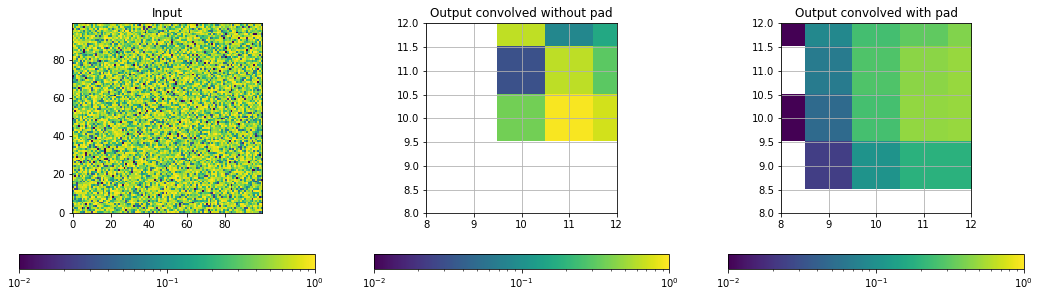

In [19]:
import matplotlib.colors as colors

# set the norm for the logscale
norm = colors.LogNorm(vmin=1e-2, vmax=1)

# figure setup
fig = plt.figure(figsize=(18,5))

# subplot 1 (input image)
ax = fig.add_subplot(131)
plt.title('Input')
c = ax.imshow(B_rand , cmap='viridis', origin='lower', norm=norm, interpolation='None')
plt.colorbar(c, orientation='horizontal')

# subplot 2 (input image with pad)
ax = fig.add_subplot(132)
plt.title('Output convolved without pad')
c = ax.imshow(B_rand_pad , cmap='viridis', origin='lower', norm=norm, interpolation='None')
plt.colorbar(c, orientation='horizontal')
ax.set_xlim(8,12)
ax.set_ylim(8,12)
ax.grid(True)

# subplot 3 (output image with pad, convolved)
ax = fig.add_subplot(133)
plt.title('Output convolved with pad')
c = ax.imshow(A_rand_pad , cmap='viridis', origin='lower', norm=norm, interpolation='None')
plt.colorbar(c, orientation='horizontal')
ax.set_xlim(8,12)
ax.set_ylim(8,12)
ax.grid(True)


Apparently a lot of the "lost flux" was moved to a one-pixel-wide rim around the original limits before padding. Let's sum up within this new boundary.

In [20]:
############
# overview #
############
print('sum of input  (not padded) ', np.sum(B_rand))
print('sum of input  (padded)     ', np.sum(B_rand_pad))
print('sum of output (not padded) ', np.sum(A_rand_norm))
print('sum of output (padded)     ', np.sum(A_rand_pad))
print('sum of output (padded)     ', np.sum(A_rand_pad[10:-10,10:-10]), 'within old limits')
print('sum of output (padded)     ', np.sum(A_rand_pad[9:-9,9:-9]), 'plus one-pixel-wide rim')

sum of input  (not padded)  4941.595576842997
sum of input  (padded)      4941.595576842997
sum of output (not padded)  4894.465569587035
sum of output (padded)      4941.595576842997
sum of output (padded)      4894.465569587036 within old limits
sum of output (padded)      4941.595576842997 plus one-pixel-wide rim


The "lost flux" leaked out of the image and is mostly concentrated in this rim.

### Problem 3: Gaussian Kernel

It is time to look at more realistic kernels of optical devices. In the lecture you heard, that for circular openings, the kernel can be approximated by a Gaussian profile. 

$$K\sim \exp(-(x^2 + y^2)/2\sigma^2)$$

Create a Gaussian kernel 101x101 pixels and use it to convolve. For now, set ``sigma=10.``.

For this task let's use a more realistic image. Load the ``face`` image provided by ``scipy``.

In [21]:
from scipy import misc
face = misc.face(gray=True)

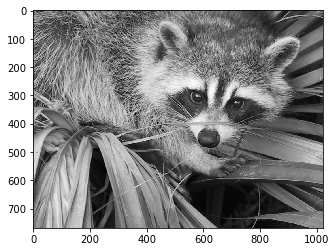

In [22]:
plt.imshow(face, cmap='gray', interpolation='None')

In [23]:
# put your code here




We need a kernel with Gaussian shape (for small kernels uneven shapes are better). 

You can either write a small routine ...

In [24]:
def gauss_kernel(n, sigma):
    
    if (n % 2) == 0: 
        n = n + 1
        print('extending by one pixel ')
    
    x = np.arange(n)
    y = np.arange(n)
    X, Y = np.meshgrid(x, y)
    
    center = int(n / 2.)
    
    z = np.exp(-((X - center)**2 + (Y - center)**2) / (2 * sigma**2))
    
    return z


In [25]:
K_gauss = gauss_kernel(n=100, sigma=10.)

extending by one pixel 


... or use the built function from ``scipy``:

In [26]:
kernel_scipy = np.outer(signal.windows.gaussian(101, 10.), signal.windows.gaussian(101, 10.))

The result should be the same.

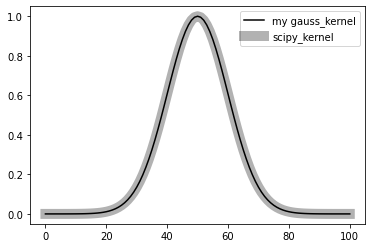

In [27]:
plt.plot(K_gauss[:,50], 'k-', label='my gauss_kernel')
plt.plot(kernel_scipy[:,50], 'k-', lw=10, alpha=0.3, label='scipy_kernel')
plt.legend()

Now we convolve with the Gaussian kernel and plot the result.

In [28]:
# convolve with the Gaussian kernel
face_gauss = signal.fftconvolve(face, K_gauss/np.sum(K_gauss), mode='same')

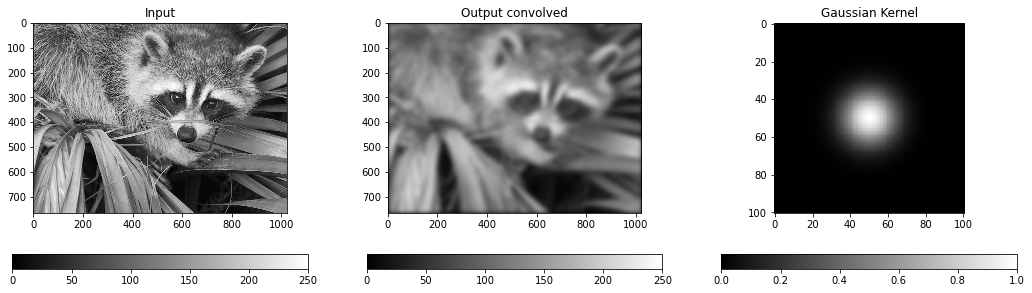

In [29]:
# figure setup
fig = plt.figure(figsize=(18,5))

# subplot 1 (input image)
ax = fig.add_subplot(131)
plt.title('Input')
c = ax.imshow(face , cmap='binary_r', interpolation='None', vmin=0, vmax=250)
plt.colorbar(c, orientation='horizontal')

# subplot 2 (output image convolved)
ax = fig.add_subplot(132)
plt.title('Output convolved')
c = ax.imshow(face_gauss , cmap='binary_r', interpolation='None', vmin=0, vmax=250)
plt.colorbar(c, orientation='horizontal')

# subplot 3 (Gaussian kernel)
ax = fig.add_subplot(133)
plt.title('Gaussian Kernel')

c = ax.imshow(K_gauss , cmap='binary_r', interpolation='None')
plt.colorbar(c, orientation='horizontal')

### Problem 4: Outlook to the Project Phase

Above you used $\sigma=10$. However, $\sigma$ depends on properties of the image and the optical device it was observed with. E. g. for a circular opening one can approximate:

$$K\sim \exp(-(x^2 + y^2)/2\sigma^2)~~~\mbox{with}~~~\sigma \approx 0.45 \frac{\lambda}{D\theta}$$

* $\theta$ as pixel resolution in radians
* $D$ as diameter of the device
* $\lambda$ as the wavelength of the light.

In the project phase one team will also deal with the measured kernels from optical devices, e. g. telescopes. 

Below I display a kernel of the Herschel Space Telescope (PACS 1 band).

<table><tr><td><img src="https://www2.mpia-hd.mpg.de/IRSPACE/herschel/herschel2_large.jpg"></td><td><img src="PACS_kernel.png"></td></tr></table>

Comment on the profile shape and also on the diffraction pattern (kernel). Have also a look at the telescope picture. Do you have an idea where the spikes come from?

In [30]:
# put your markdown here



Answer: The Herschel telescope has a round opening, but it also has a secondary mirrow mounting (non-circular). This is adding to the diffraction pattern. If we have a look at the profile, it still looks like an airy function and can still be approximated by an Gaussian.

### Appendix | how to create the profiles above